In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [3]:
connectdb = sqlite3.connect("banco.db")
query = """
SELECT categoria, SUM(valor) as total
FROM lancamentos
GROUP BY categoria
"""

In [4]:
rel = pd.read_sql_query(query, connectdb)
connectdb.close()  # Fecha a conexão

In [5]:
rel

,categoria,total
0,transporte,100.0


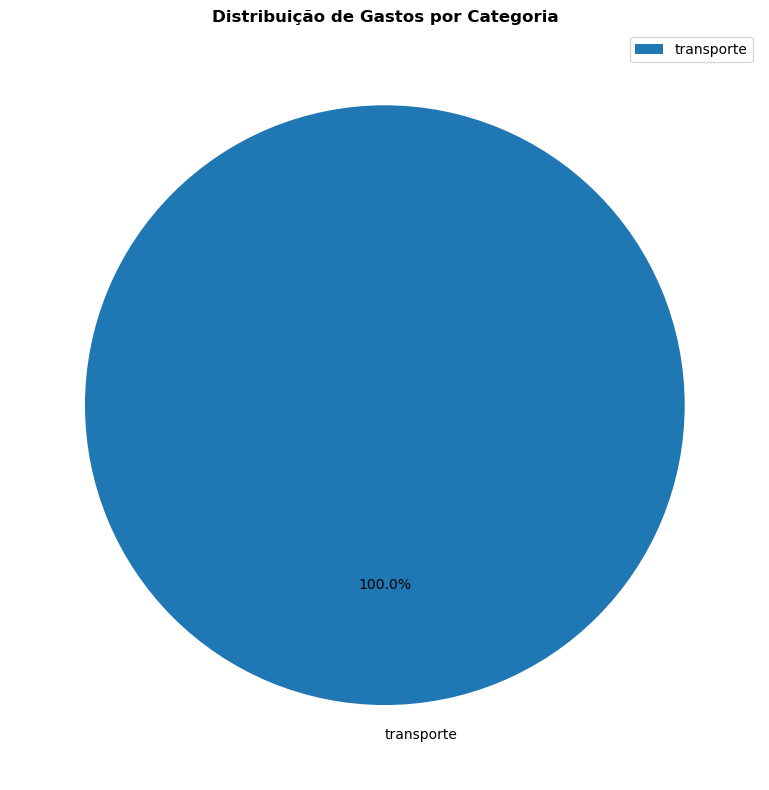

In [6]:
plt.figure(figsize=(8, 8))
plt.pie(
    rel['total'],
    labels=rel['categoria'],
    autopct='%1.1f%%',
    startangle=90,      
)

plt.title('Distribuição de Gastos por Categoria', fontweight='bold')
plt.legend(rel['categoria'], loc="best", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [7]:
##PESQUISA NO DB RELATORIOS

In [8]:
#pesquisa do banco de dados relatorios

connectdb = sqlite3.connect("banco.db")
query = """
        SELECT *
        FROM lancamentos
    """
relatoriossql = pd.read_sql_query(query, connectdb)


In [9]:
relatoriossql.head()

,id,descricao,categoria,valor,data
0,1,Compra de 10 embalagens,transporte,100.0,2025-05-08


In [16]:
#ultimo registro pega os filtros do cliente da tabela relatório

ultimo_registro = pd.read_sql("SELECT * FROM Relatorios ORDER BY id DESC LIMIT 1", connectdb)
ultimo_registro.head()

,id,data_inicial,data_final,valor_minimo,valor_maximo,pesquisa_categoria
0,3,2025-05-01,2025-05-08,0.0,100.0,transporte


In [17]:
#transcrevendo as Columns de "ultimo registro pra variaveis"
minimo = float(ultimo_registro.loc[0, "valor_minimo"])
maximo = float(ultimo_registro.loc[0, "valor_maximo"])
inicial = ultimo_registro.loc[0, "data_inicial"]
final = ultimo_registro.loc[0, "data_final"]
categoria = str(ultimo_registro.loc[0, "pesquisa_categoria"])


In [18]:
#pesquisa no banco de dados "lancamentos" e filtrando baseado no filtro do usuario

query = ("""
    SELECT * FROM lancamentos
    WHERE 
        data >= :data_inicial
        AND data <= :data_final
        AND valor >= :valor_minimo
        AND valor <= :valor_maximo
        AND categoria = :categoria
""")

#passagem de parâmetros de variaveis (evita sqlinjection 
lancamento_filtrado = pd.read_sql_query(
    query,
    connectdb,
    params={
        'data_inicial': inicial,
        'data_final': final,
        'valor_minimo': minimo,
        'valor_maximo': maximo,
        'categoria': categoria
    }
)

print(lancamento_filtrado.head())

   id                descricao   categoria  valor        data
0   1  Compra de 10 embalagens  transporte  100.0  2025-05-08
